
<font color="#C71585"> </font>
# Statitstical Analysis of NASA M6 
#### ** Description of NASA M6 key statistics 
#### ** Correlation Analysis of Intensity Indicators, _frp, brightness, bright_t31_ 
#### ** A peak into the distribution of 'frp', _an indicator of fire intensity_:   https://feer.gsfc.nasa.gov/projects/emissions/
#### ** Correlation Analysis of Intensity and Emission: https://www.sciencedirect.com/science/article/pii/S1352231019303164
#### ** Heatmap of fire Intensity over the United States 
#### ** Correlation Analysis of Intensity and Fire Size 

In [1]:
# Numpy = Numeric Computing
import numpy as np
# MatPlotLib = classic Python math plotting library
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.style as stl
# Pandas = Python Data Analysis, home of the DataFrame
import pandas as pd
# Seaborn = Statistical plotting built on top of MatPlotLib
import seaborn as sns
from sklearn import preprocessing
#sql engine
from sqlalchemy import create_engine   
#database connection variables 
import config 
from yellowbrick.target import BalancedBinningReference
import os

sns.set(style="ticks", color_codes=True)

# Tell MatPlotLib to draw plots inline with the code outputs
%matplotlib inline

# If you have a Mac or other high-res display you can include this:
%config InlineBackend.figure_format = 'retina'

### Connect to the hosted SQL database 

In [57]:
# Skip this block if reading from disk

# create sqlalchemy engine
engine = create_engine('mysql+mysqlconnector://{user}:{password}@{host}/{dbname}'
                       .format(user=config.db_user,
                               password=config.db_pass,
                               dbname=config.db_main,
                               host=config.db_host))

### Query the tables

In [58]:
#Skip this block if reading from local disk

#Create Query Statments
# queryWeather = "SELECT * FROM Weather LIMIT 100;"

# queryEmissions = "SELECT * FROM Emissions_Data LIMIT 50000;"


queryNASA = "SELECT * FROM NASA;"

queryModel = "SELECT * FROM Fire_Intensity_Model_Clean LIMIT 100000;"

In [59]:
#Skip this block if reading from local disk

#Execute Queries
# dfWeather = pd.read_sql(queryWeather, engine)
# dfEmissions = pd.read_sql(queryEmissions, engine)
# dfNASA = pd.read_sql(queryNASA, engine)
dfModel = pd.read_sql(queryModel, engine)

#close the database connection
engine.dispose()

In [60]:
#Save data to local disk

#Execute Queries

# dfWeather.to_csv('/Users/nahidmacbook/Predicting-Wildfires/data/weather.csv', index = False)
# dfEmissions.to_csv('/Users/nahidmacbook/Predicting-Wildfires/data/Emission.csv', index = False)
# dfNASA.to_csv('/Users/nahidmacbook/Predicting-Wildfires/data/NASA.csv', index = False)
dfModel.to_csv('/Users/nahidmacbook/Predicting-Wildfires/data/Model.csv', index = False)

In [61]:
#Read the data from disk for faster access

#read the raw data from the database stored on disk
# dfWeather = pd.read_csv('/Users/nahidmacbook/Predicting-Wildfires/data/weather.csv')
# dfEmissions = pd.read_csv('/Users/nahidmacbook/Predicting-Wildfires/data/Emission.csv')
#dfNASA = pd.read_csv('/Users/nahidmacbook/Predicting-Wildfires/data/NASA.csv')
dfModel = pd.read_csv('/Users/nahidmacbook/Predicting-Wildfires/data/Model.csv')

#read the updated ML cvs files stored at the end of the notebook
#dfWeather = pd.read_csv('data/weather_ML.csv')
#dfEmissions = pd.read_csv('data/emissions_ML.csv')

### <font color="#C71585"> Load Data </font>
### Load Data

In [2]:
# NASA M6 Dataset 
M6df = pd.read_csv('/Users/nahidmacbook/Documents/DataScience/Data-Wildfire/fire_archive_M6_110066.csv')

In [3]:
# Set Month and Year
M6df['month'] = pd.DatetimeIndex(M6df['acq_date']).month
M6df['year'] = pd.DatetimeIndex(M6df['acq_date']).year

In [27]:
# NASA M6 and USDA Fires Grouped by State Dataset
NASAgroupedUSDA = pd.read_csv('/Users/nahidmacbook/Documents/DataScience/Data-Wildfire/GroupedConnectedNASA-USDA.csv')

In [44]:
# NASA M6 and USDA Fires Combined Dataset
NASA_USDA = pd.read_csv('/Users/nahidmacbook/Documents/DataScience/Data-Wildfire/ConnectedNASA-USDA.csv')

In [150]:
pd.options.display.float_format = '{:.5f}'.format

### <font color="#C71585"> Description of NASA M6 key statistics  </font>
### Description of NASA M6 key statistics

In [151]:
M6df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type,month,year
count,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000,2159468.00000
mean,40.08462,-107.36341,325.30246,1.61535,1.21272,1656.28663,68.02787,6.20496,295.38018,65.40101,0.08680,6.62814,2010.78615
std,11.24505,22.49238,23.46184,0.81869,0.24961,505.00190,22.93650,0.02172,9.50356,199.20439,0.40986,2.89275,4.98291
min,18.93250,-173.96370,300.00000,1.00000,1.00000,0.00000,0.00000,6.20000,264.30000,-59.20000,0.00000,1.00000,2003.00000
25%,32.62270,-119.93710,310.30000,1.10000,1.00000,1626.00000,54.00000,6.20000,289.80000,11.00000,0.00000,4.00000,2006.00000
50%,37.05290,-99.06825,318.90000,1.30000,1.10000,1838.00000,69.00000,6.20000,295.10000,22.70000,0.00000,7.00000,2011.00000
75%,44.76070,-89.80830,332.60000,1.90000,1.30000,1947.00000,86.00000,6.20000,300.30000,53.10000,0.00000,9.00000,2015.00000
max,70.45650,-67.00420,506.50000,4.80000,2.00000,2359.00000,100.00000,6.30000,400.10000,14376.50000,3.00000,12.00000,2019.00000


In [152]:
pd.reset_option('^display.', silent=True)

The description clearly shows outliers for the key intensity indicators. Looking at the sudden jump from the 75th percentile to the Max value, we can predict the great skew that we will see in our intensity indicators' plots. We will cut the ending tails of the Intensity indicators to plot more readable visualizations.

### <font color="#C71585"> Boxplot of key intensity indicators  </font>
### Boxplot of key intensity indicators

In [14]:
selected_M6df = M6df[['frp','brightness','bright_t31']]

In [23]:
selected_intensity = selected_M6df[selected_M6df['frp'] < 2000]

In [ ]:
selected_brightness 

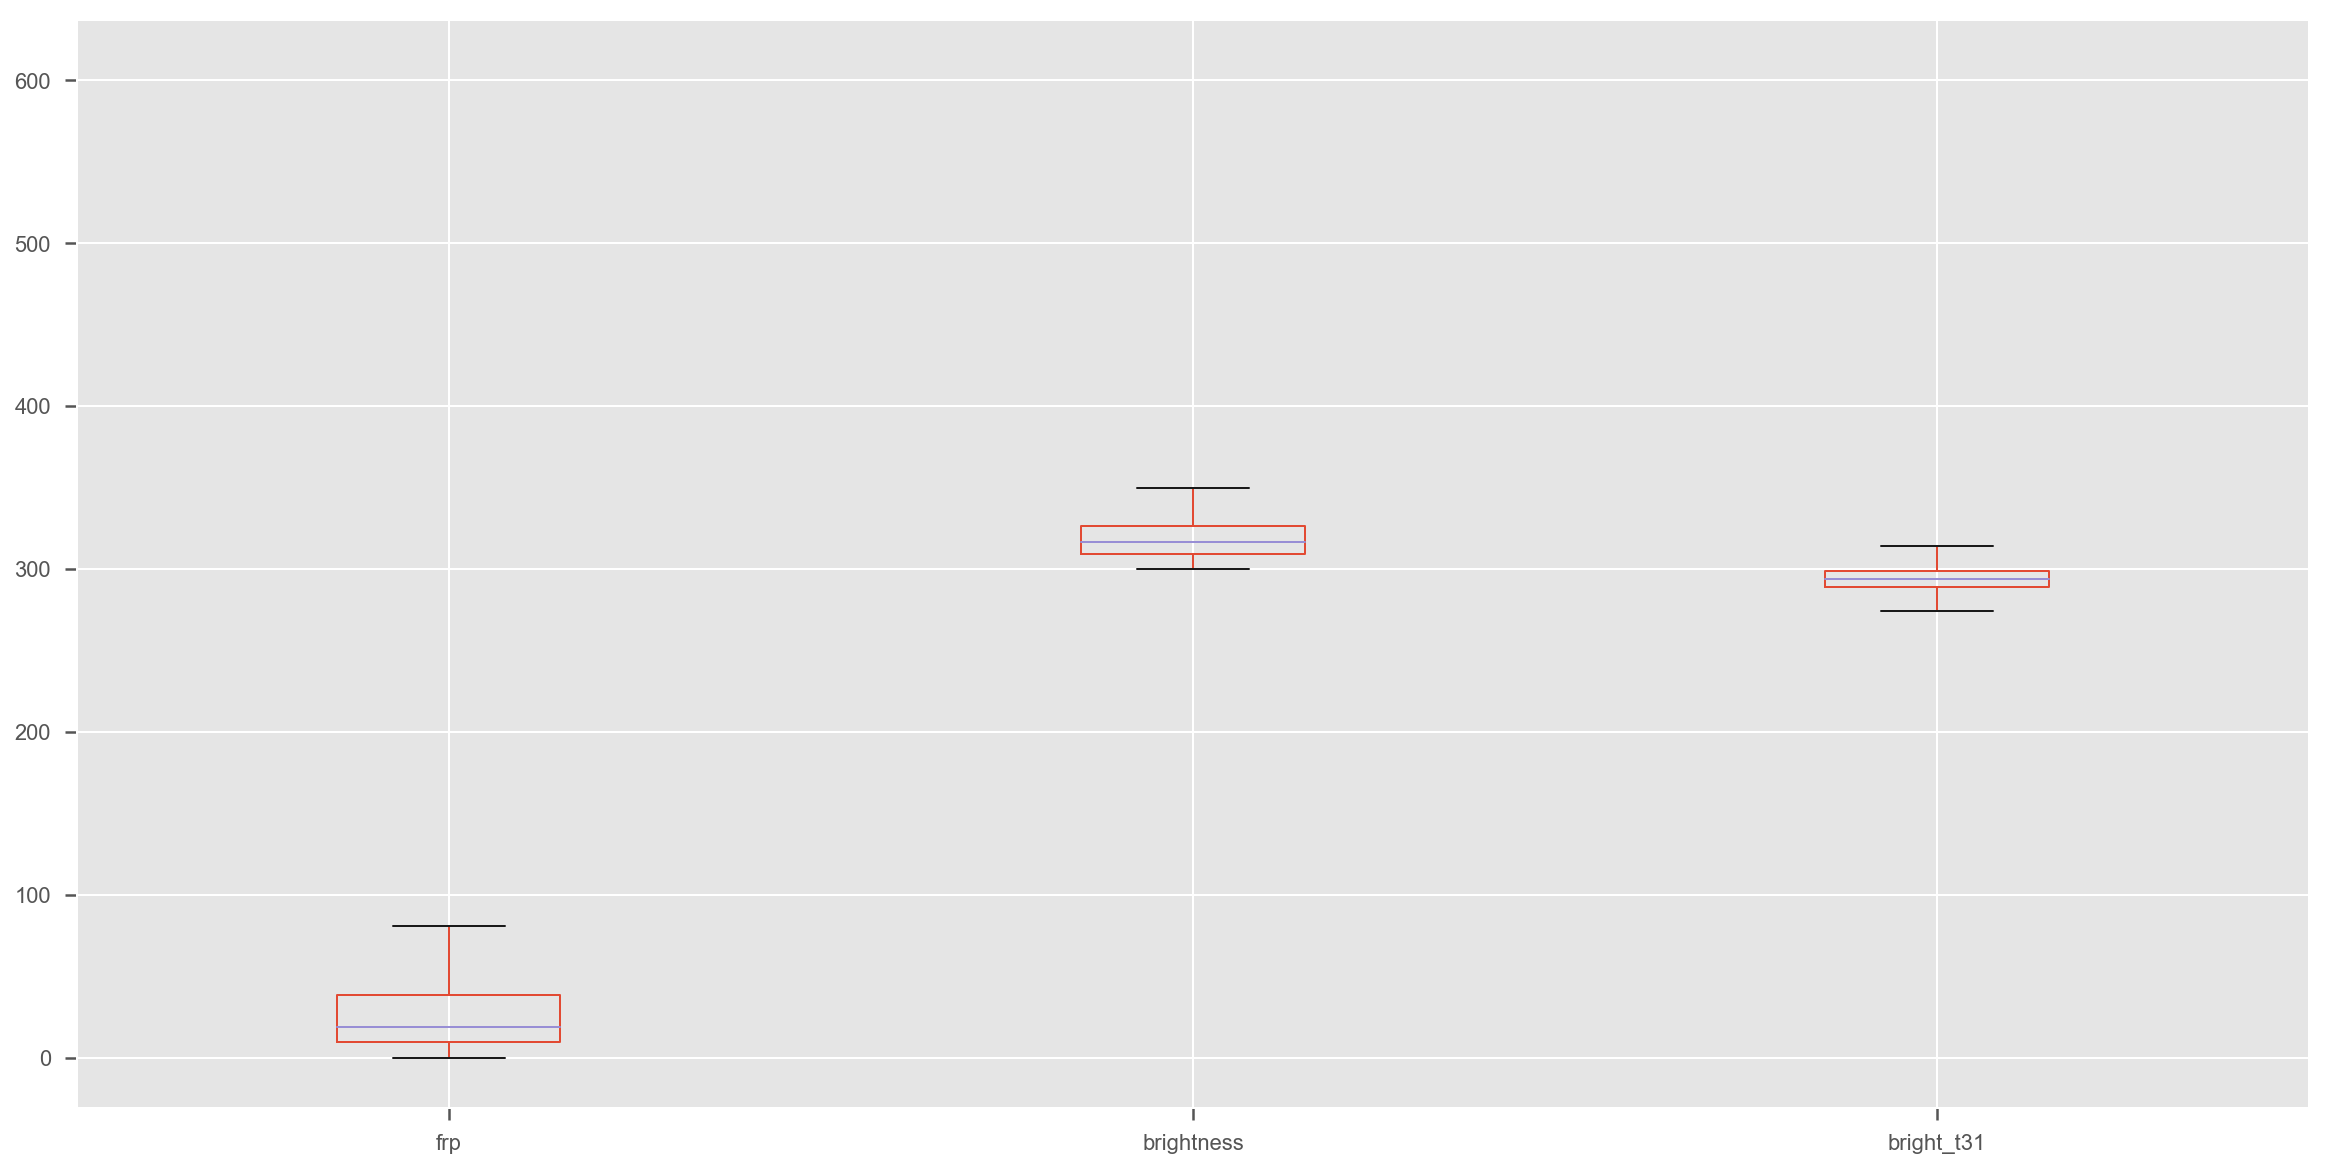

In [203]:
stl.use('ggplot')
selected_intensity.plot(kind='box',figsize=(20,10))

### <font color="#C71585"> Pairplot of key intensity indicators  </font>
### Pairplot of key intensity indicators

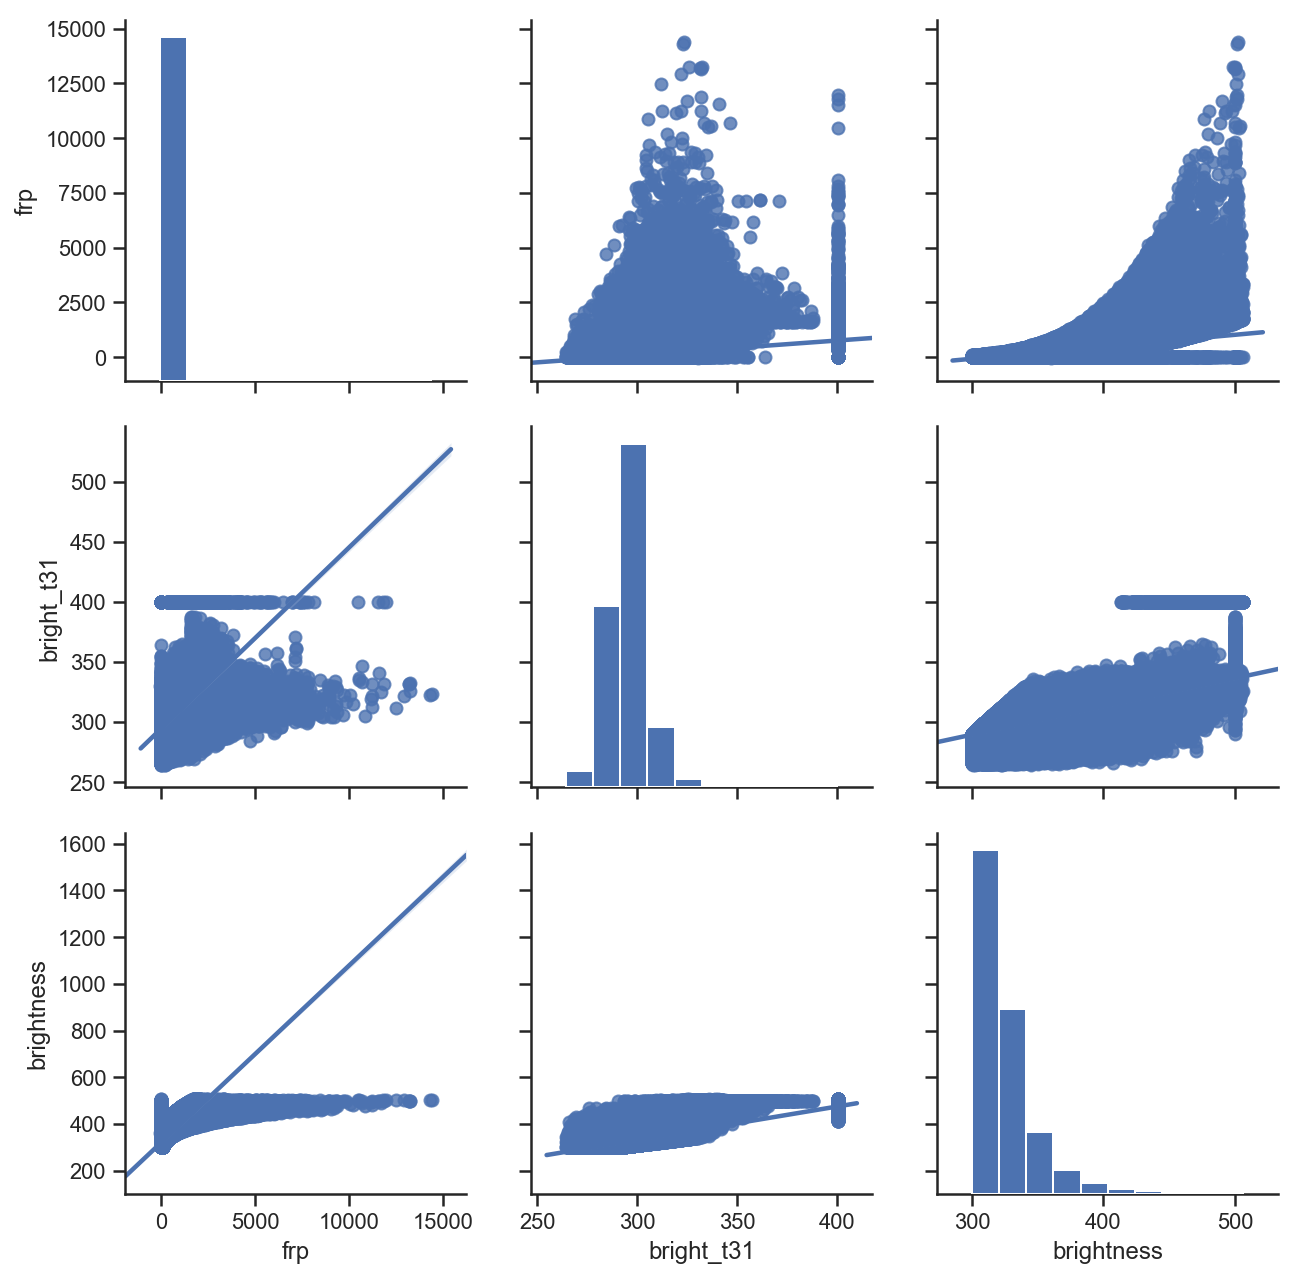

In [217]:
g = sns.pairplot(M6df, height=3, vars=['frp','bright_t31','brightness'], kind="reg")

### <font color="#C71585"> Correlation Analysis of key Intensity Indicators </font>
### Correlation Analysis of key Intensity Indicators

In [33]:
# Correlation Analysis of key intensity indicators
x_values = M6df['brightness']
y_values = M6df['frp']
z_values = M6df['bright_t31']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of Brightness and FRP: {r_squared1:.9f}")
print(f"R2 Correlation of Brightness and Bright_t31: {r_squared2:.9f}")
print(f"R2 Correlation of FRP and Bright_t31: {r_squared3:.9f}")

R2 Correlation of Brightness and FRP: 0.415403183
R2 Correlation of Brightness and Bright_t31: 0.335916857
R2 Correlation of FRP and Bright_t31: 0.100193615


- <font color="#C71585"> R2 Correlation of Brightness and FRP: 0.415403183 </font> R2 Correlation of Brightness and FRP: 0.415403183
- <font color="#C71585"> R2 Correlation of Brightness and Bright_t31: 0.335916857 </font> R2 Correlation of Brightness and Bright_t31: 0.335916857
- <font color="#C71585"> R2 Correlation of FRP and Bright_t31: 0.100193615 </font> R2 Correlation of FRP and Bright_t31: 0.100193615
- <font color="#C71585"> There is a strong linear relationship between "Brightness and Bright_t31". </font> There is a strong linear relationship between "Brightness and Bright_t31".
- <font color="#C71585"> "Brightness" correlates with "FRP" in an exponential manner. </font> "Brightness" correlates with "FRP" in an exponential manner.

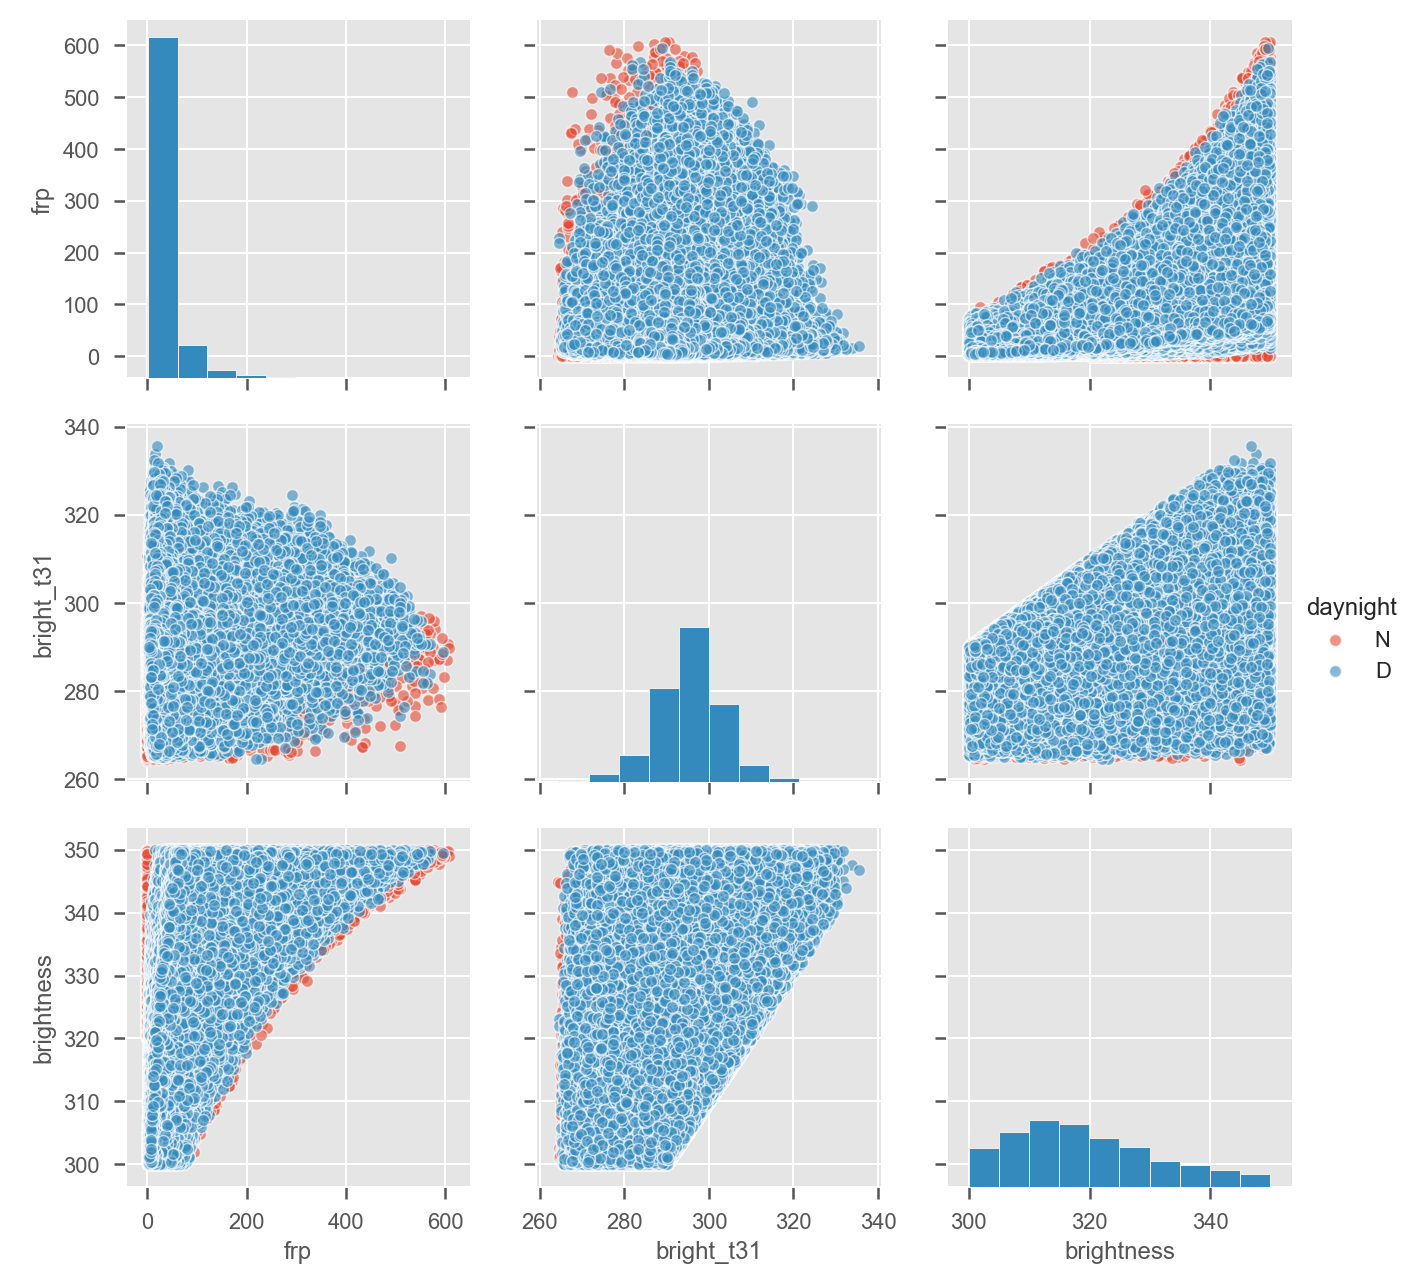

In [175]:
g = sns.pairplot(selected_intensity, height=3, diag_kind="hist",
                 vars=['frp','bright_t31','brightness'], hue="daynight", plot_kws = {'alpha': 0.6})

### <font color="#C71585"> Scaling the key intensity indicators  </font>
### Scaling the key intensity indicators

In [85]:
# Standardize the key intensity variables for easier plot reading

X_array = np.array(selected_M6df)
X_scaled = preprocessing.scale(X_array)

In [86]:
scaled_M6df = pd.DataFrame.from_records(X_scaled)

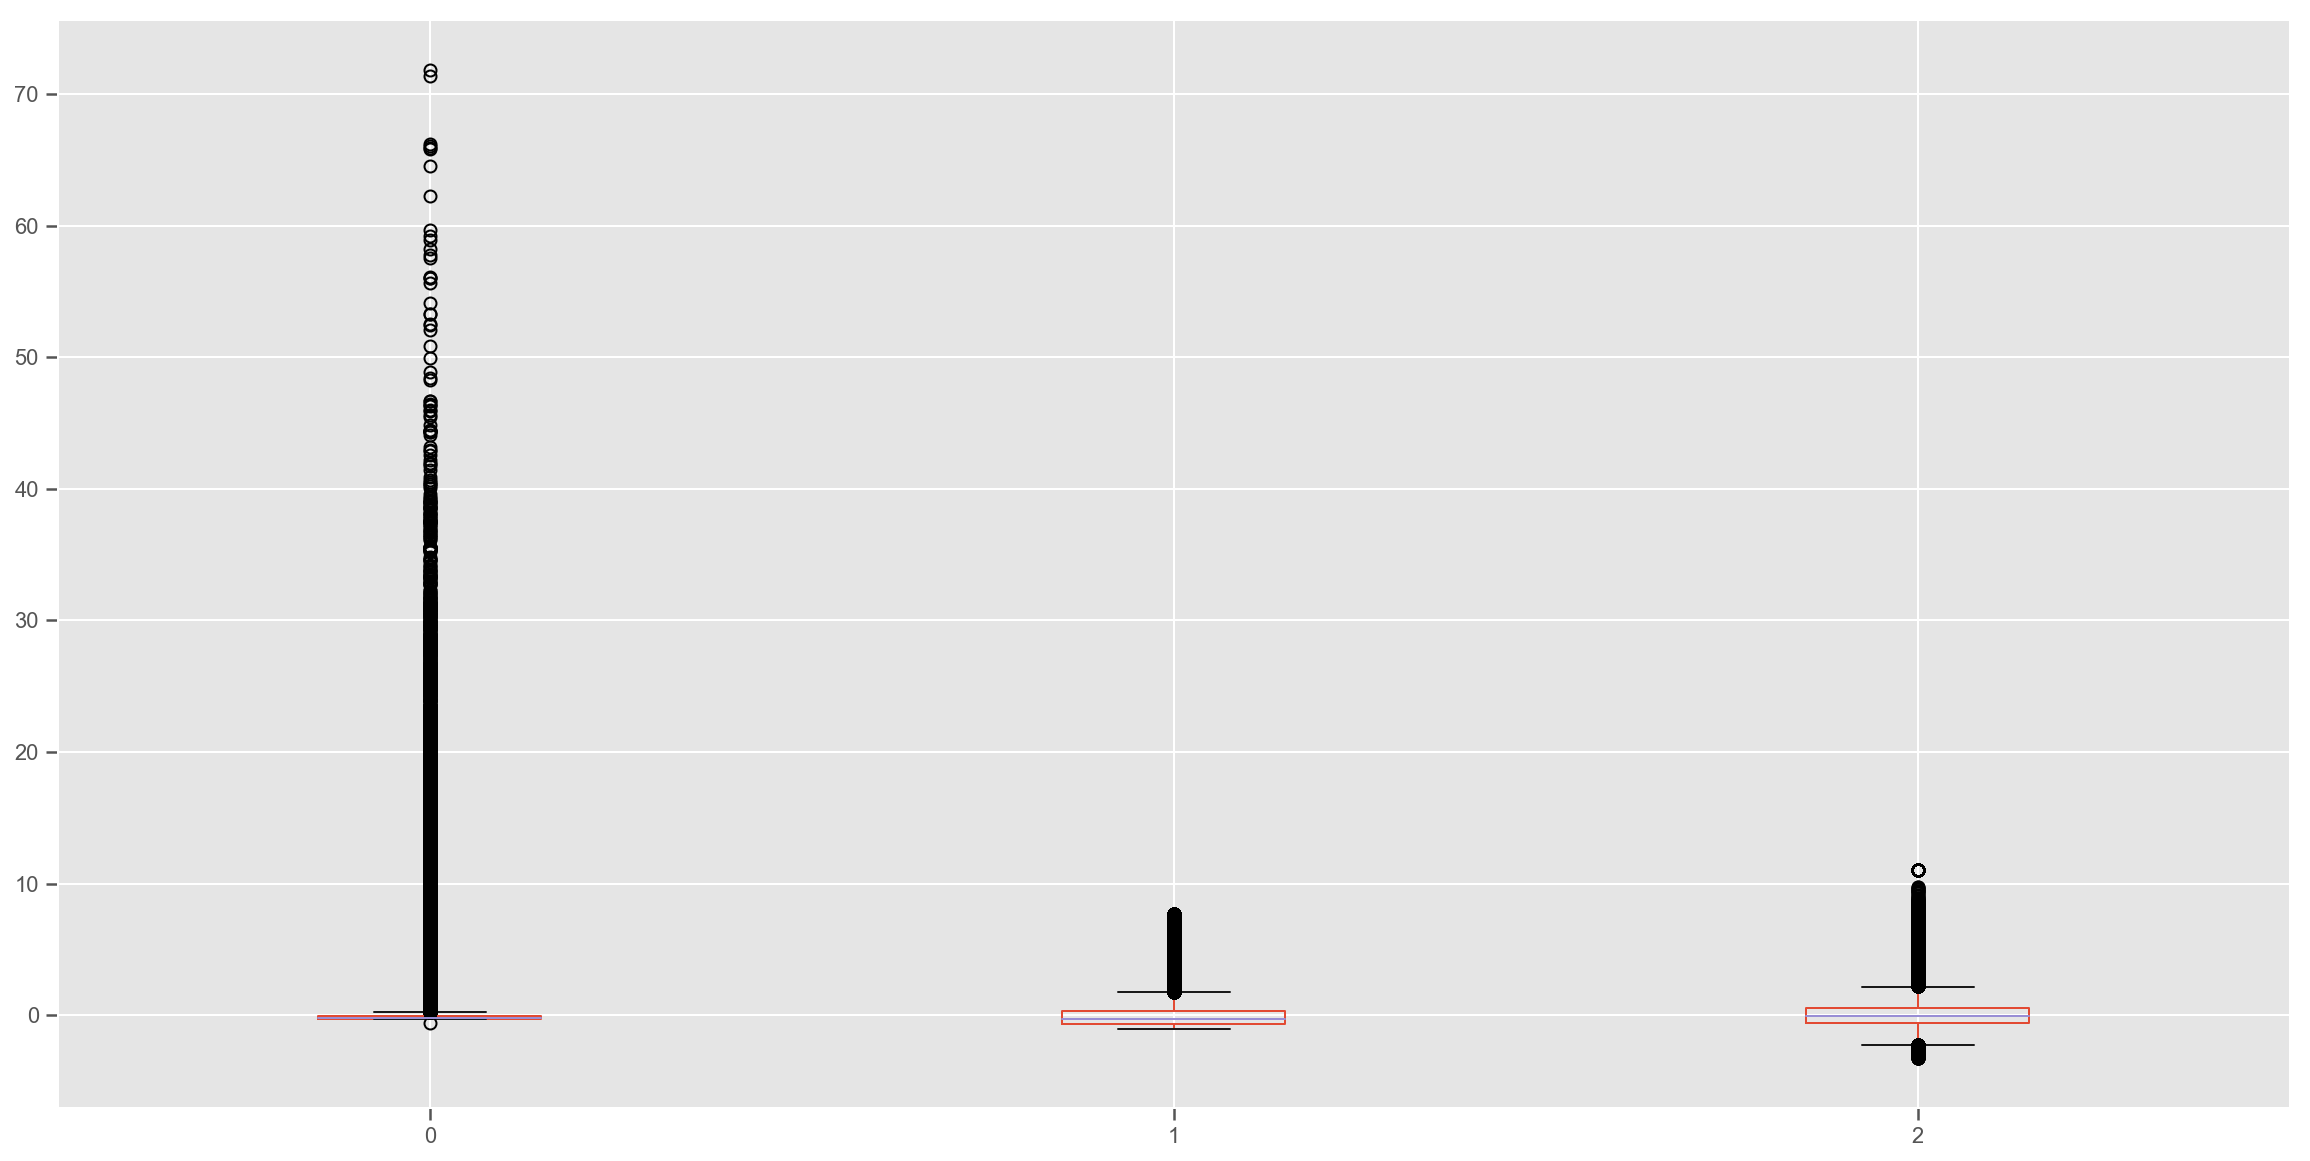

In [35]:
stl.use('ggplot')
scaled_M6df.plot(kind='box',figsize=(20,10))

The ranges clearly shows outliers that can be eliminated in further visualizations


### <font color="#C71585"> Boxplot and Histogram of FRP and Brightness (Normalized)  </font>
### Boxplot and Histogram of FRP and Brightness (Normalized)

In [24]:
# Normalize the skewed FRP and Brightness
x1_array = np.array(selected_intensity['frp'])
x2_array = np.array(selected_intensity['brightness'])
normalized_X1 = preprocessing.normalize([x1_array])
normalized_X2 = preprocessing.normalize([x2_array])

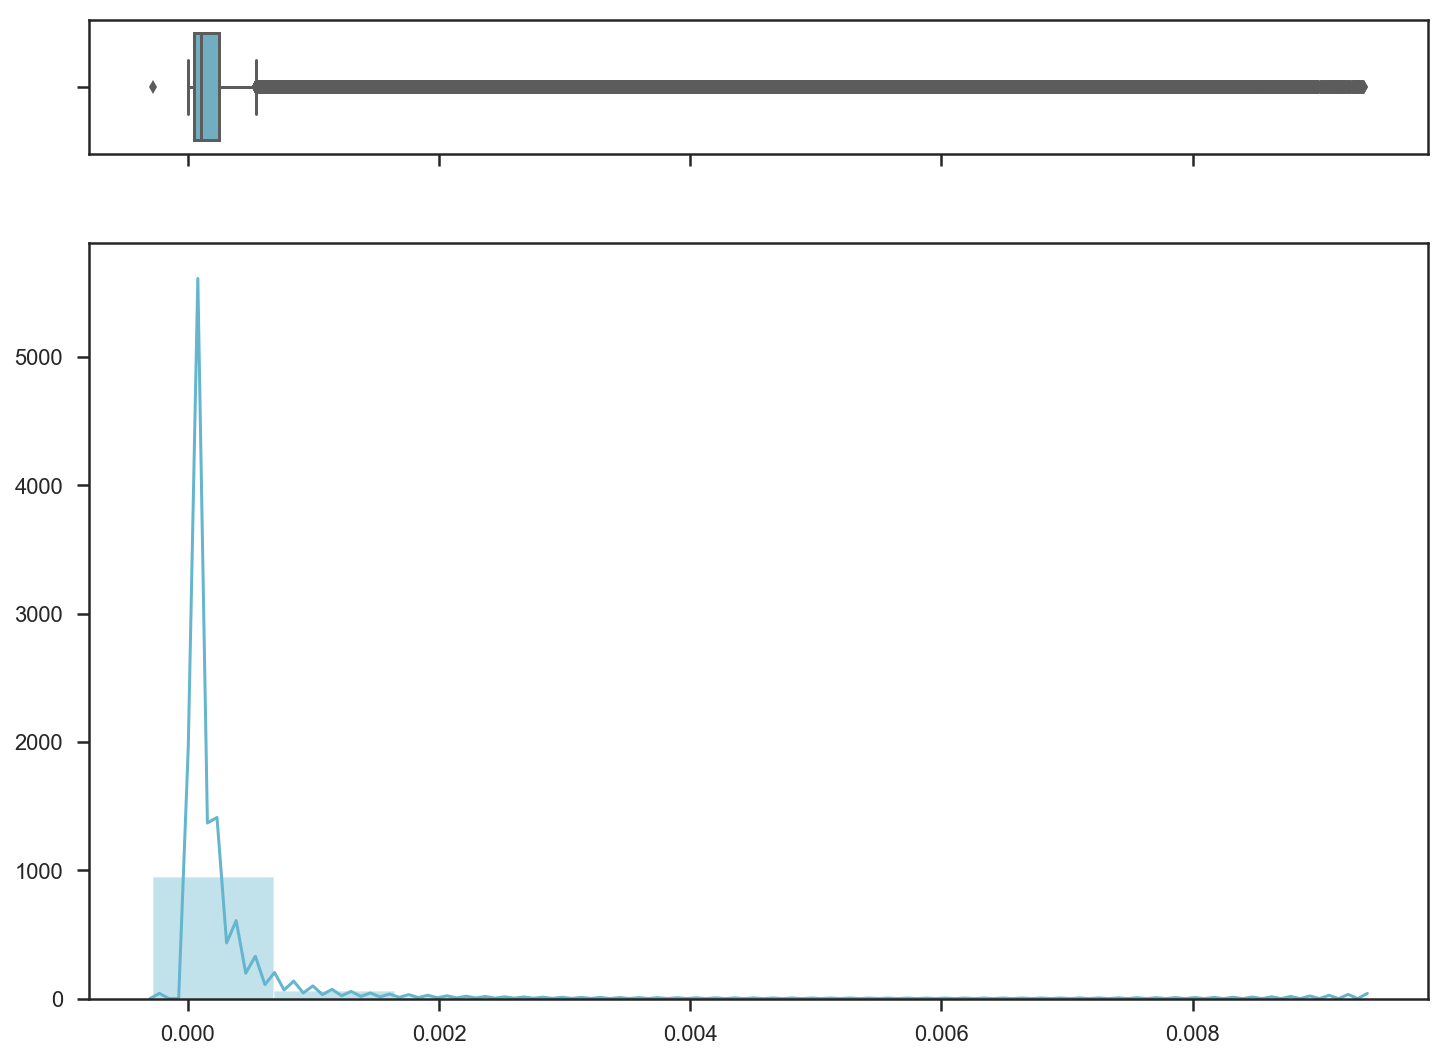

In [25]:
# Cut the plot window into 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12, 9),
                                    gridspec_kw={"height_ratios": (.15, .85)})

# TODO: Add a boxplot and a distplot. Set the number of bins on the distplot to 20.

sns.boxplot(normalized_X1, ax = ax_box, color='c')
sns.distplot(normalized_X1, ax = ax_hist, bins=10, color='c')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.show()

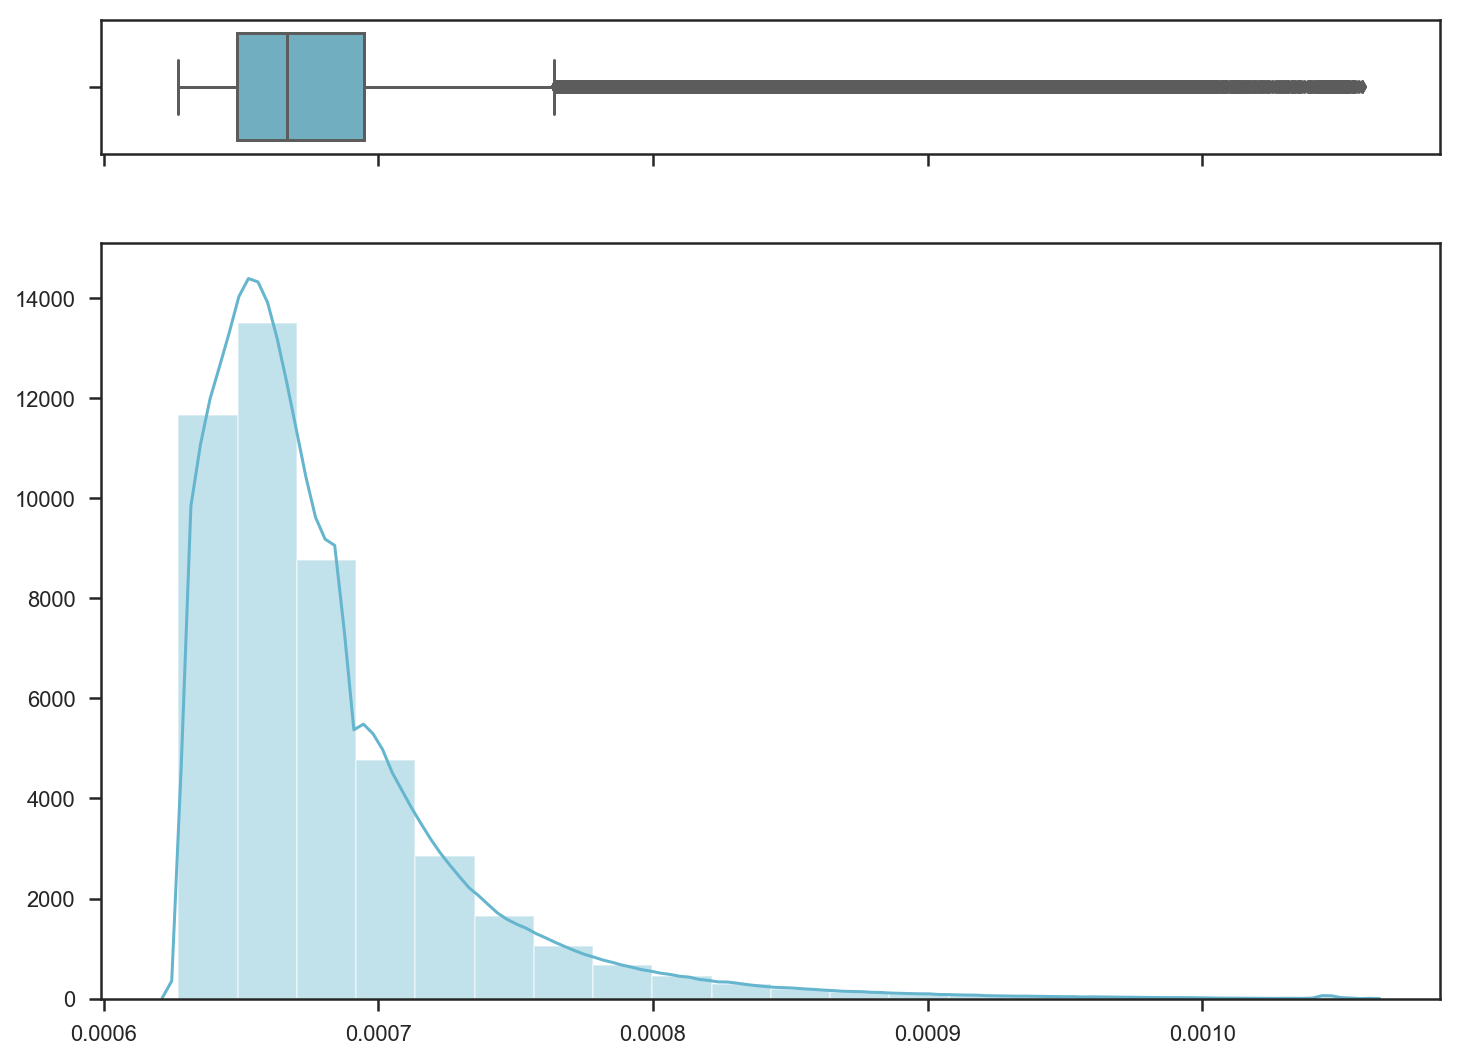

In [26]:
# Cut the plot window into 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12, 9),
                                    gridspec_kw={"height_ratios": (.15, .85)})
 
# TODO: Add a boxplot and a distplot. Set the number of bins on the distplot to 20.

sns.boxplot(normalized_X2, ax = ax_box, color='c')
sns.distplot(normalized_X2, ax = ax_hist, bins=20, color='c')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

### <font color="#C71585"> Binnerizing Brightness as our Y variable  </font>
### Binnerizing Brightness as our Y variable

In [30]:
# Standard Scaler of Key Intensity Features
scaler = preprocessing.StandardScaler().fit(selected_M6df)
TransformedBrightness = scaler.transform(selected_M6df)[:,1]

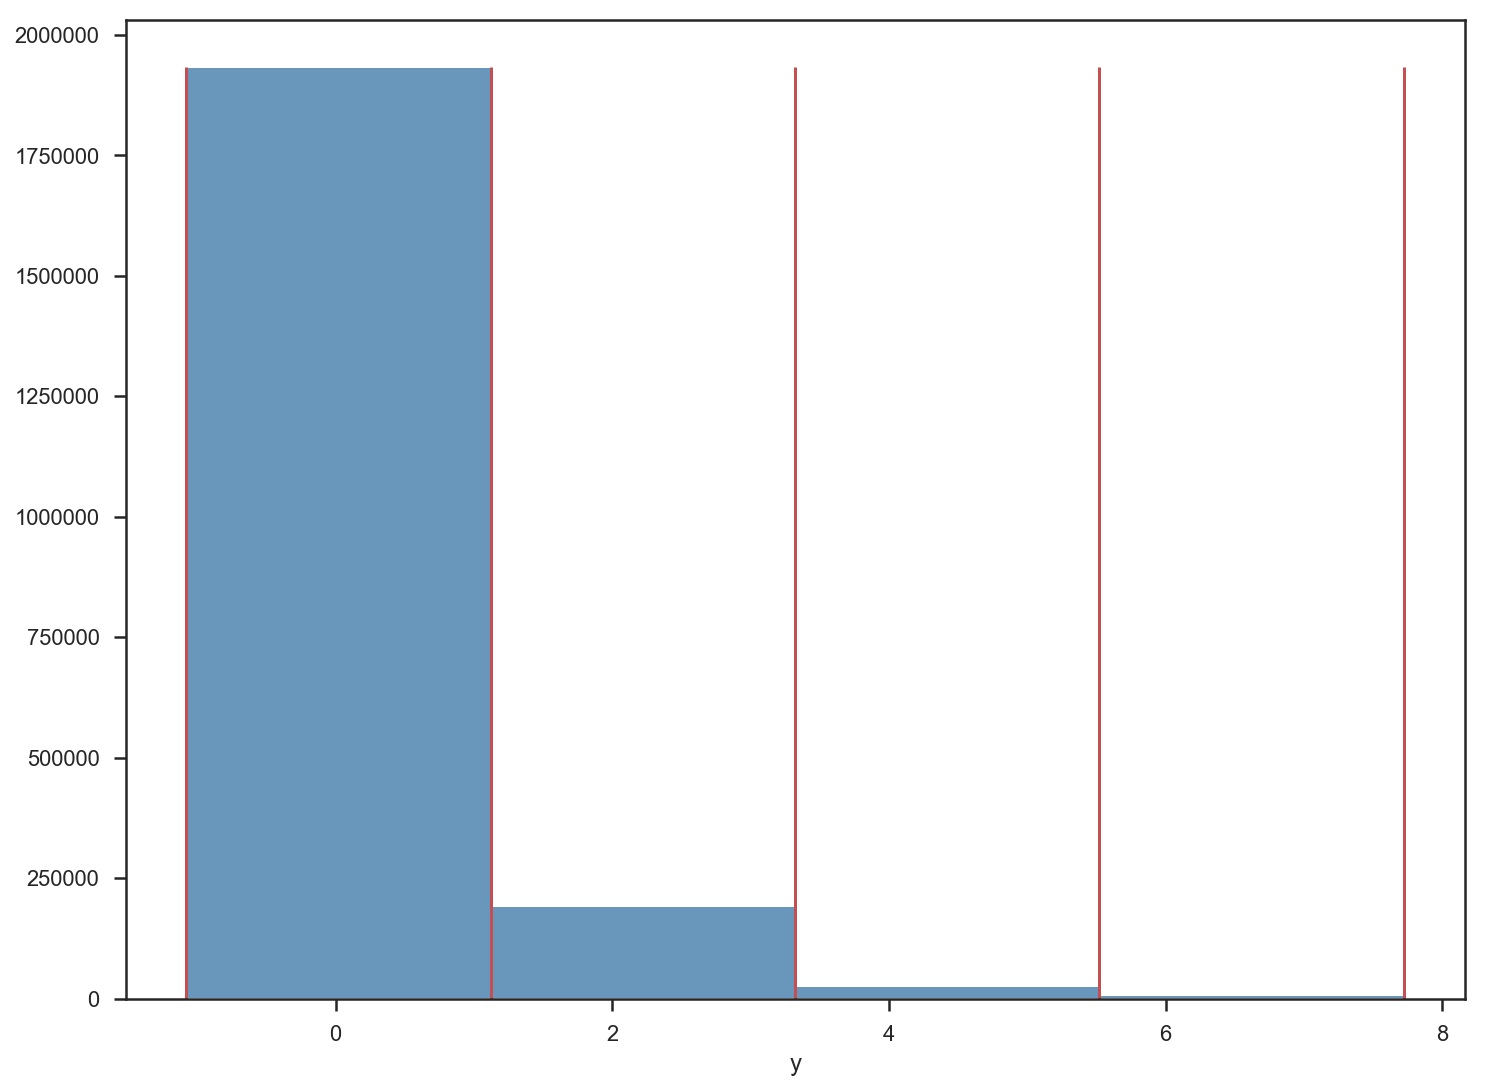

In [31]:
# Balanced Binning of Transformed Brightness
visualizer = BalancedBinningReference()

visualizer.fit(TransformedBrightness)        # Fit the data to the visualizer
visualizer.show() 

#### Will cutting the tail of the Y data and using the Robust Scaler change the binning?

In [21]:
# Robust Scaler of Key Intensity Features
scaler = preprocessing.RobustScaler().fit(selected_intensity)

In [22]:
RobustScaler = scaler.transform(selected_intensity)[:,1]

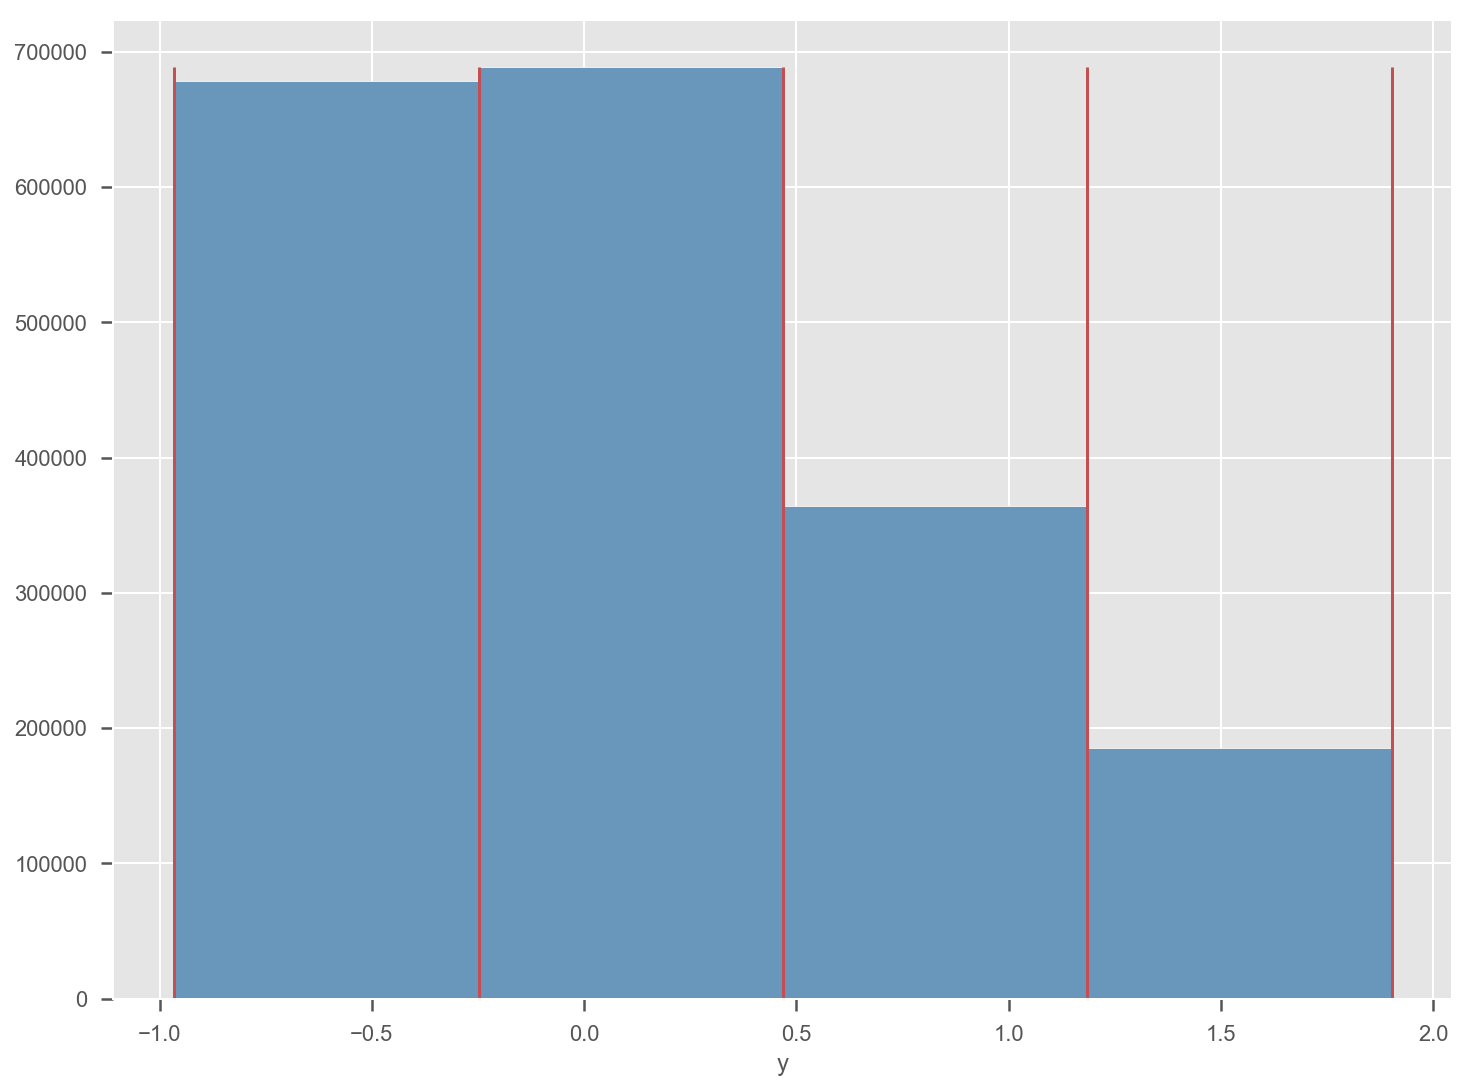

In [195]:
visualizer = BalancedBinningReference()

visualizer.fit(RobustScaler)        # Fit the data to the visualizer
visualizer.show() 

##### The number of bins suggested by the binning function is 4 and using different scalers does not change the result.

### <font color="#C71585"> Visualizer to bin the Intensity Variable into balanced bins  </font>
### Visualizer to bin the Intensity Variable into balanced bins

The balanced binning function above has suggested 4 bins for the Intensity variable. We will use the IQR values as our binning references to bin the severely skewed Fire Intensity data. 

IQR Ranges: green and red lines
Mean: Dotted black line line
Binning Reference Values are: 310.30 ,318.90 , and 332.60 with 310.30 as Median value.


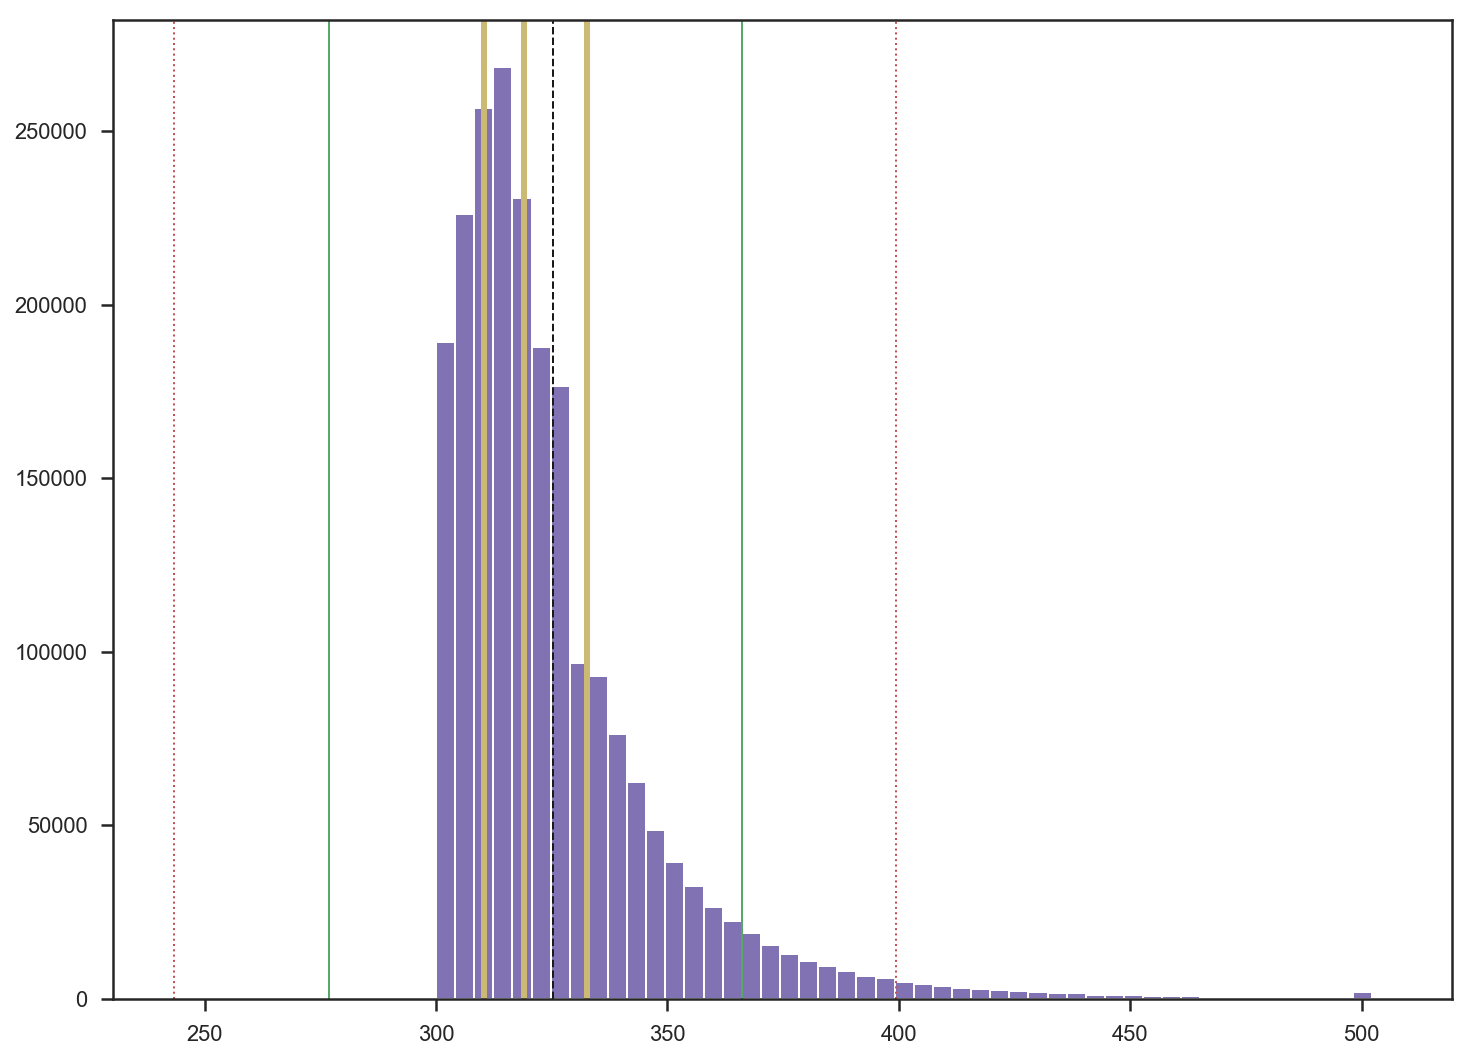

In [5]:
# 
plt.hist(M6df['brightness'],50, color='m')

# Indicate the mean with a black dashed line
plt.axvline(M6df['brightness'].mean(), color='k', linestyle='dashed', linewidth=1)

# Compute the 25th, 50th, and 75th percentiles for the data
Min, Q1, median, Q3, Max = np.percentile(M6df['brightness'], [0,25,50,75,100])
# TODO: Calculate the IQR
IQR = Q3-Q1

# Indicate the inner and outer guides computed from the IQR
# Data outside the inner range guides are outliers
# Data outside the outer range guides are extreme values
inner_range_lower = Q1 - 1.5*IQR
inner_range_upper = Q3 + 1.5*IQR
outer_range_lower = Q1 - 3.0*IQR
outer_range_upper = Q3 + 3.0*IQR


# TODO: Plot 4 more lines for the inner and outer ranges.
# Make all of them red. 
# Make the inner ranges solid lines
# Make the outer ranges dotted lines

plt.axvline(inner_range_lower, color='g', linestyle='solid', linewidth=1)
plt.axvline(inner_range_upper, color='g', linestyle='solid', linewidth=1)
plt.axvline(outer_range_lower, color='r', linestyle='dotted', linewidth=1)
plt.axvline(outer_range_upper, color='r', linestyle='dotted', linewidth=1)
plt.axvline(Q1, color='y', linestyle='solid', linewidth=3)
plt.axvline(median, color='y', linestyle='solid', linewidth=3)
plt.axvline(Q3, color='y', linestyle='solid', linewidth=3)

plt.rcParams["figure.figsize"] =(12,9)

#print(f"Inner Range Lower: {inner_range_lower:.2f}")
#print(f"Inner Range Upper: {inner_range_upper:.2f}")
#print(f"Outer Range Lower: {outer_range_lower:.2f}")
#print(f"Outer Range Upper: {outer_range_upper:.2f}")

print(f"IQR Ranges: green and red lines")
print(f"Mean: Dotted black line line")
print(f"Binning Reference Values are: {Q1:.2f} ,{median:.2f} , and {Q3:.2f} with 310.30 as Median value.")
#print(f"Min: {Min:.2f}")
#print(f"Max: {Max:.2f}")


Text(0, 0.5, 'Counts')

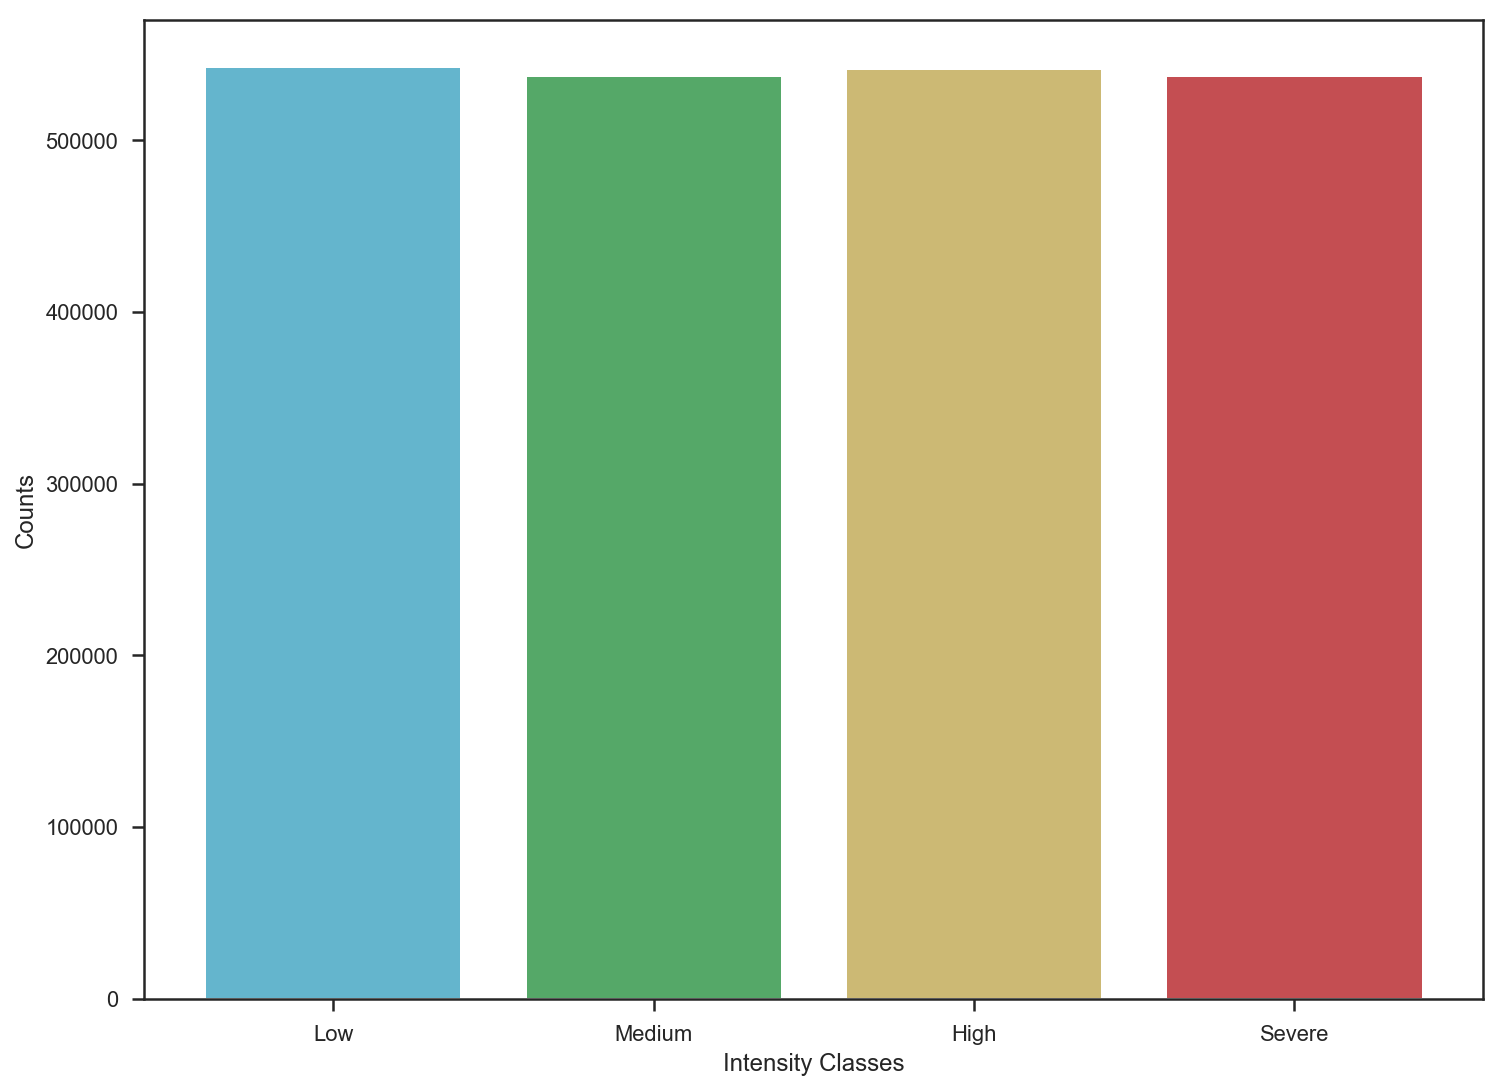

In [6]:
bins = np.array([(Min-0.1), 310.30, 318.90, 332.60, (Max+0.1)])
inds = np.digitize(M6df['brightness'], bins,right=True)
counts = np.unique(inds, return_counts=True)[1]

# use matplotlib to view the binned result
plt.bar(["Low", "Medium", "High", "Severe"], counts, color=['c', 'g', 'y', 'r'])
plt.xlabel("Intensity Classes")
plt.ylabel("Counts")

### <font color="#C71585"> Interactive heatmap of Fire Intensity across the United States  </font>
### Interactive heatmap of Fire Intensity across the United States

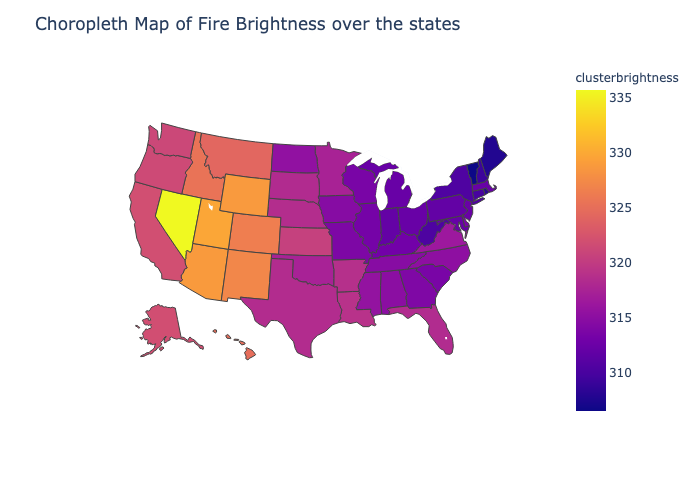

In [28]:
# Heat map of Radiation on States

import plotly.express as px  # Be sure to import express
import plotly.io as pio
from IPython.display import Image

fig = px.choropleth(NASAgroupedUSDA,  # Input Pandas DataFrame
                    locations= "state",
                    color="clusterbrightness",  # DataFrame column with color values
                    hover_name="clusterbrightness", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Choropleth Map of Fire Brightness over the states', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
#fig.show()  # Output the plot to the screen as an static image
Image(pio.to_image(fig, format='png'))

### <font color="#C71585"> Interactive heatmap of Fire Intensity across the United States  </font>
### Interactive heatmap of Fire Intensity across the United States

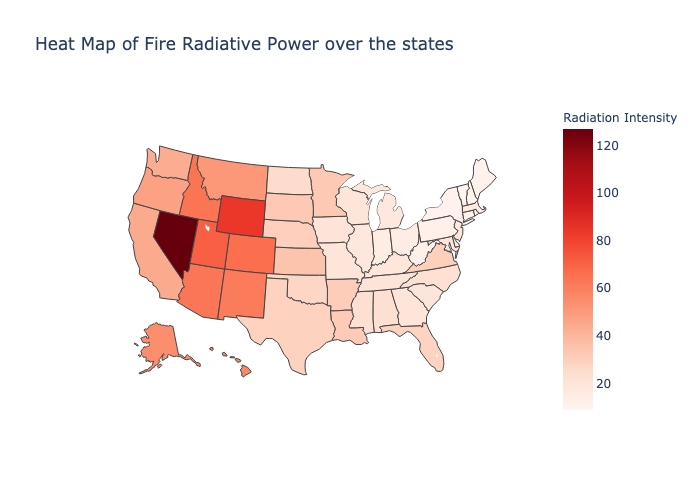

In [47]:
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image

fig = go.Figure(data=go.Choropleth(
    locations=NASAgroupedUSDA['state'], # Spatial coordinates
    z = NASAgroupedUSDA['clusterfrp'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Radiation Intensity",
))

fig.update_layout(
    title_text = 'Heat Map of Fire Radiative Power over the states',
    geo_scope='usa', # limite map scope to USA
)

#fig.show()   # Instead of showing the image, convert it to a static image
Image(pio.to_image(fig, format='png'))

### <font color="#C71585"> Correlation Analysis of Fire Intensity and Fire Size  </font>
### Correlation Analysis of Fire Intensity and Fire Size 

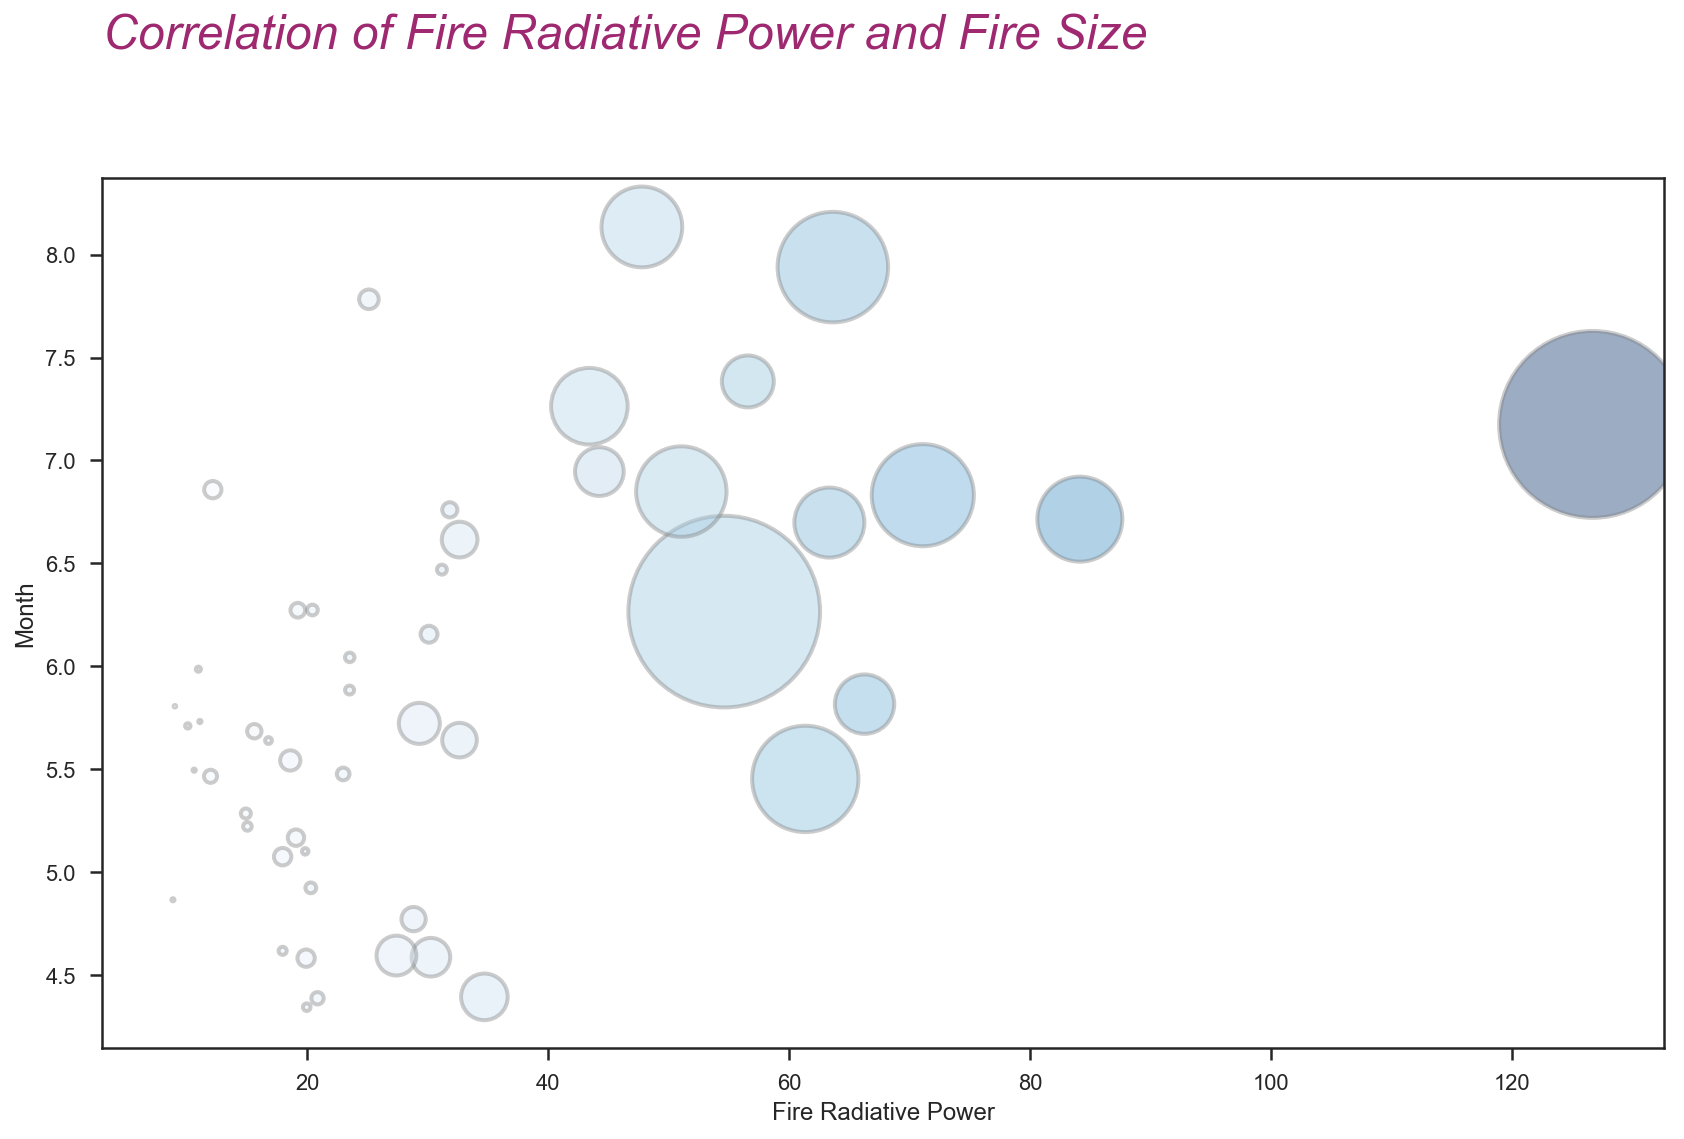

In [50]:
x = NASAgroupedUSDA['clusterfrp']
y = NASAgroupedUSDA['clustermonth']
z = NASAgroupedUSDA['firesize']
# Change color with c and alpha. I map the color to the X axis value.
plt.figure(figsize=(14, 8))
plt.scatter(x, y, s=z, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("Fire Radiative Power")
plt.ylabel("Month")
plt.text(3,9,"Correlation of Fire Radiative Power and Fire Size", fontsize = 24, color='#9E2971', fontstyle='italic')
plt.show()

### <font color="#C71585"> Heatmap of Fire Intensity Seasonality  </font>
### Heatmap of Fire Intensity Seasonality

Text(2, 13, 'Fire Intensity Seasonality')

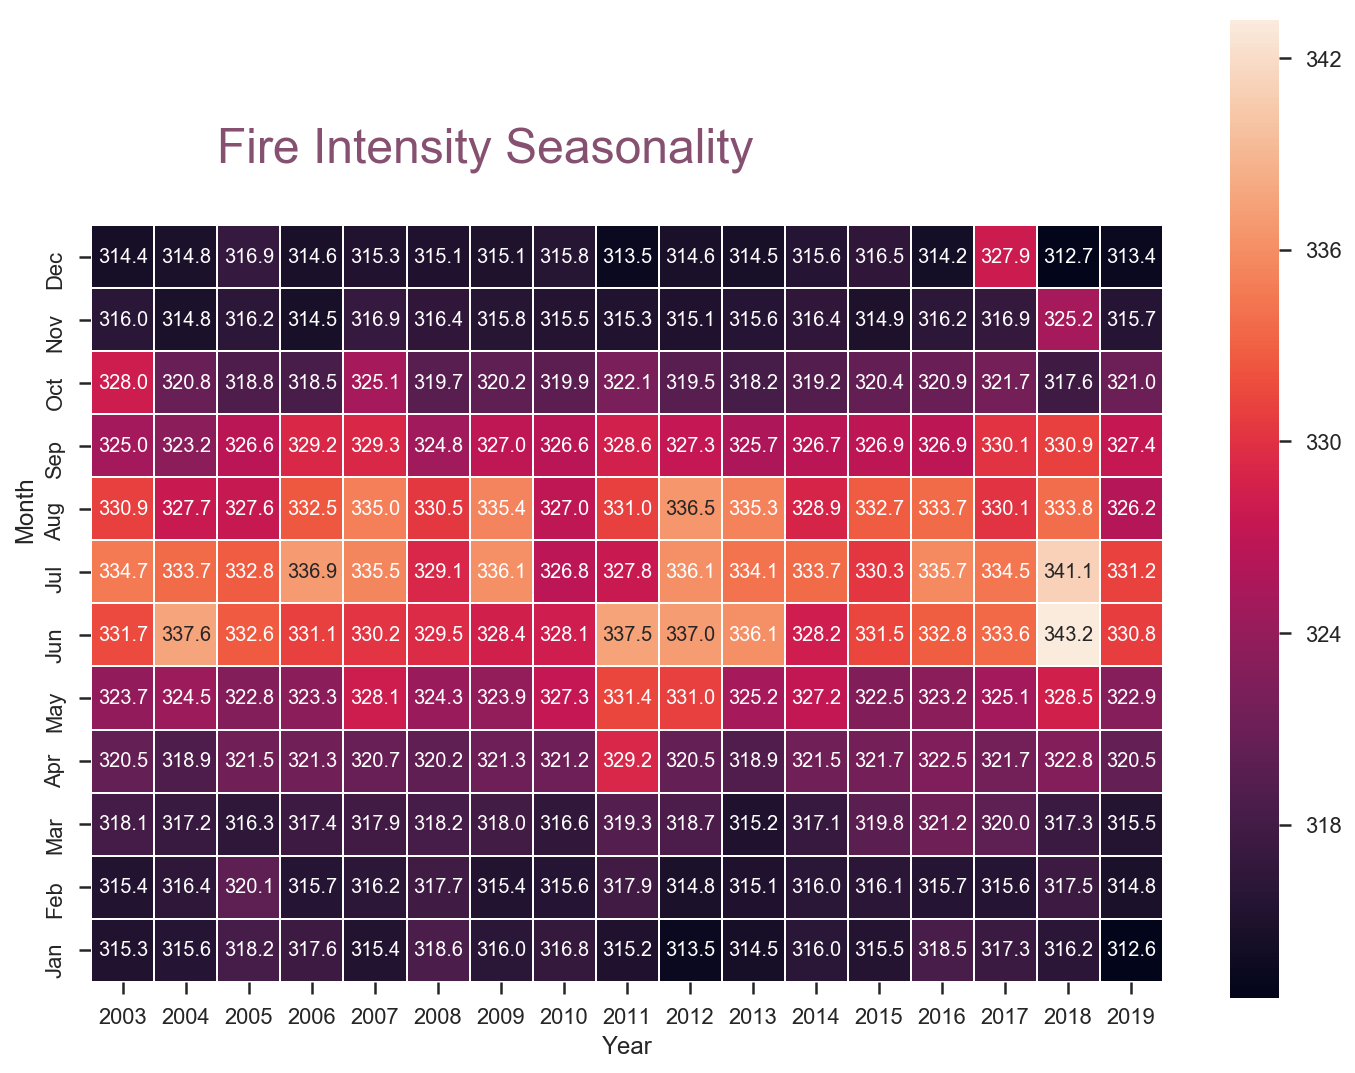

In [36]:
# Pivot from M6 DataFrame
HeatDf = M6df.pivot_table(index='month', columns='year', values='brightness')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Set lables
month_short_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yticklabels=month_short_names

# Draw a heatmap with the numeric values in each cell
sns.heatmap(HeatDf, annot=True, linewidths=.5, square=True, fmt=".1f", yticklabels=month_short_names, ax=ax)
plt.xlabel('Year')
plt.ylabel('Month')
ax.set_ylim((0,15))
plt.text(2,13,"Fire Intensity Seasonality", fontsize = 24, color='#865171')

### <font color="#0093bb"> On the Model Table </font>
### On the Model Table

In [74]:
dfModel.columns

Index(['index', 'latitude', 'longitude', 'doy', 'month', 'year',
       'cluster_reference', 'fire_region', 'season', 'covertype', 'fuelcode',
       'prefire_fuel', 'fuel_moisture_class', 'temperature', 'humidity',
       'precip_intensity', 'visibility', 'wind_speed', 'wind_gust',
       'brightness', 'fire_intensity', 'bright_t31', 'frp'],
      dtype='object')